In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\CODSOFT\titanic dataset codsoft\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data preprocessing and EDA

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# to remove missing value 
for i in ['Age','Cabin','Embarked']:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#change the datatypes
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Name']= label_encoder.fit_transform(df['Name'])
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Ticket']= label_encoder.fit_transform(df['Ticket'])
df['Cabin']= label_encoder.fit_transform(df['Cabin'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,28.566970,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.199572,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,24.000000,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


In [9]:
df.shape

(891, 12)

<Axes: >

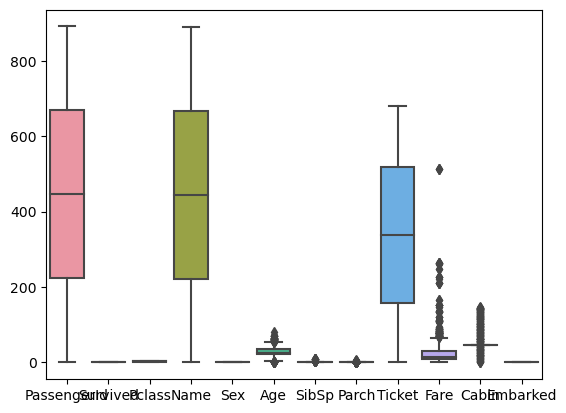

In [10]:
# to check outliers
import seaborn as sns
sns.boxplot(data=df)

In [11]:
# remove outlier winsorising technique
for i in df:
    if df[i].dtypes in ("int64", "float64") :
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        df[i].clip(upper =ul, lower=ll,inplace = True)    

<Axes: >

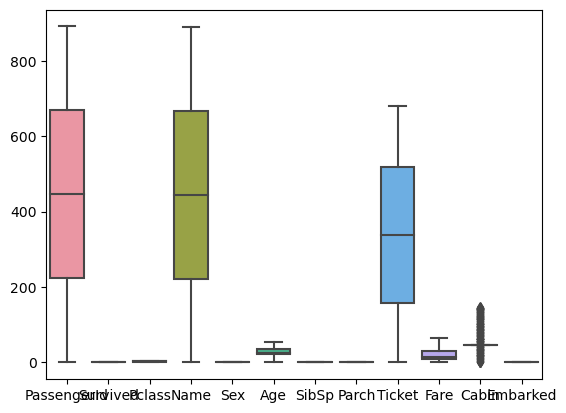

In [12]:
sns.boxplot(data=df)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1.0,0,523,7.2500,47,2
1,2,1,1,190,0,38.0,1.0,0,596,65.6344,81,0
2,3,1,3,353,0,26.0,0.0,0,669,7.9250,47,2
3,4,1,1,272,0,35.0,1.0,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0.0,0,472,8.0500,47,2


# model building

<Axes: xlabel='Survived', ylabel='count'>

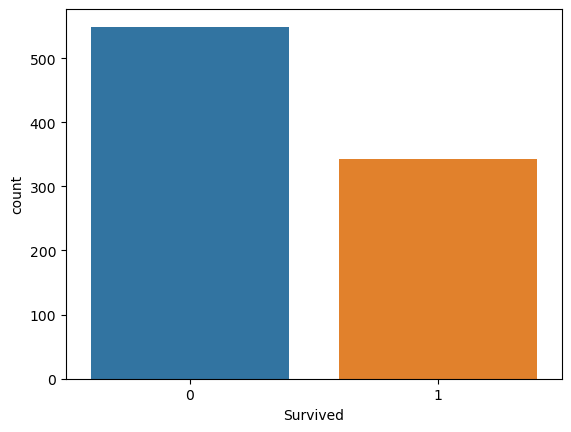

In [14]:
sns.countplot(x=df['Survived'])

In [15]:
#used standardization

In [16]:
std = StandardScaler()
std_array = std.fit_transform(df.iloc[:,:11])
df2 = pd.DataFrame(std_array)
df2

,0,1,2,3,4,5,6,7,8,9,10
0,-1.730108,-0.789272,0.827377,-1.310217,0.737695,-0.510266,0.810220,0.0,0.918966,-0.820552,-0.281881
1,-1.726220,1.266990,-1.566107,-0.991410,-1.355574,0.797131,0.810220,0.0,1.282625,2.031623,1.161545
2,-1.722332,1.266990,0.827377,-0.357685,-1.355574,-0.183417,-0.602512,0.0,1.646283,-0.787578,-0.281881
3,-1.718444,1.266990,-1.566107,-0.672604,-1.355574,0.551994,0.810220,0.0,-1.442322,1.419297,0.057748
4,-1.714556,-0.789272,0.827377,-1.671790,0.737695,0.551994,-0.602512,0.0,0.664904,-0.781471,-0.281881
...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,0.400452,0.737695,-0.101705,-0.602512,0.0,-1.183277,-0.539655,-0.281881
887,1.718444,1.266990,-1.566107,-0.552079,-1.355574,-0.755403,-0.602512,0.0,-1.616678,0.290823,-1.003594
888,1.722332,-0.789272,0.827377,-0.124412,-1.355574,-0.346842,0.810220,0.0,1.676173,-0.029155,-0.281881
889,1.726220,1.266990,-1.566107,-1.415189,0.737695,-0.183417,-0.602512,0.0,-1.646568,0.290823,0.270017


# model building

In [18]:
X = df.drop('Survived', axis=1)

y = df[['Survived']]

#splitting data into traning and teststing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=0) 

# applied logistics 

In [22]:
log_reg = LogisticRegression(multi_class = "ovr")
log_reg_model = log_reg.fit(X_train,y_train)
log_reg_model

LogisticRegression(multi_class='ovr')

-  train dataset

In [26]:
y_pred_train = log_reg_model.predict(X_train)

In [28]:
accuracy = accuracy_score(y_train,y_pred_train)
print(f"Accuracy:{accuracy}")

multi_confusion_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print(multi_confusion_matrix)


class_report = classification_report(y_train, y_pred_train)
print(class_report)

Accuracy:0.7913322632423756
[[[169  73]
  [ 57 324]]

 [[324  57]
  [ 73 169]]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       381
           1       0.75      0.70      0.72       242

    accuracy                           0.79       623
   macro avg       0.78      0.77      0.78       623
weighted avg       0.79      0.79      0.79       623



# test dataset

In [29]:
y_pred_test = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred_test)
print(f"Accuracy:{accuracy}")

multi_confusion_matrix = multilabel_confusion_matrix(y_test, y_pred_test)
print(multi_confusion_matrix)


class_report = classification_report(y_test, y_pred_test)
print(class_report)

Accuracy:0.7761194029850746
[[[ 68  32]
  [ 28 140]]

 [[140  28]
  [ 32  68]]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       168
           1       0.71      0.68      0.69       100

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.78      0.78       268



## confusion metrics

<Axes: >

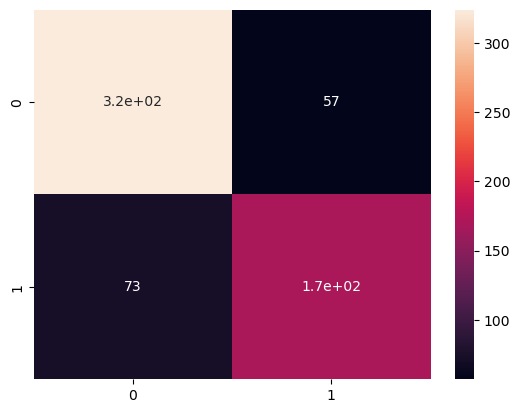

In [30]:
coef_metrix = confusion_matrix(y_train,y_pred_train)
sns.heatmap(coef_metrix,annot = True)

### random forest 

In [31]:
RF_clf = RandomForestClassifier()
RF_clf

RandomForestClassifier()

In [32]:
RF_clf_model = RF_clf.fit(X_train,y_train)
RF_clf_model

RandomForestClassifier()

# train dataset

In [36]:
y_pred_train = RF_clf_model.predict(X_train)

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       242

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623



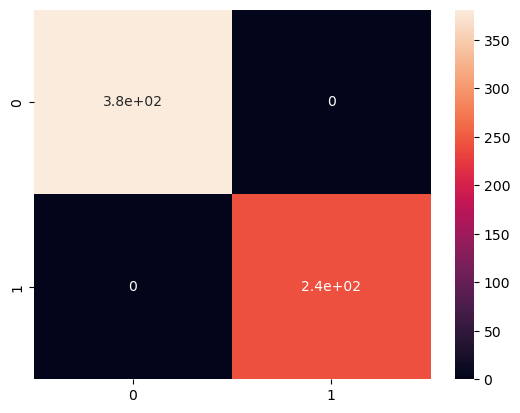

In [41]:
print("Accuracy = ", accuracy_score(y_train, y_pred_train))

sns.heatmap(confusion_matrix(y_train,y_pred_train),annot = True)

print(classification_report(y_train, y_pred_train))

# testing dataset

Accuracy =  0.8507462686567164
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       168
           1       0.83      0.75      0.79       100

    accuracy                           0.85       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268



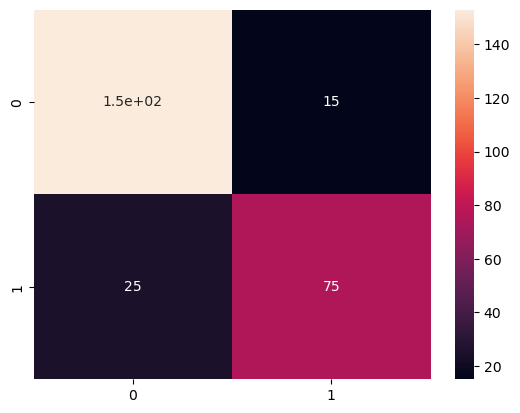

In [42]:
y_pred_test = RF_clf_model.predict(X_test)

print("Accuracy = ", accuracy_score(y_test, y_pred_test))

sns.heatmap(confusion_matrix(y_test,y_pred_test),annot = True)

print(classification_report(y_test, y_pred_test))

# finished